In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta as td
import pandas as pd
%matplotlib inline
import sys
import easygui

import json


from nptdms import TdmsFile as TF

import importlib

import mhdpy.load as load
import mhdpy.analysis as analysis
import mhdpy.plot as plot

mpl.rcParams.update({'font.size': 14})

datafolder = "C:\\Users\\aspit\\OneDrive\\Data\\"

In [2]:
folders = [datafolder + "\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\",datafolder + "\\2018-10-26\\Proj_VaporTubes\\Reprate_40C\\",datafolder + "\\2018-10-26\\Proj_VaporTubes\\Reprate\\" ]

fps_PL = []
fps_pow = []
fps_T = []

for folder in folders:
    contents = os.listdir(folder)
    for content in contents:
        fname = os.path.splitext(content)[0]
        if 'PIMAX' in fname:
            fps_PL.append(os.path.join(folder,content))
        elif 'Powermeter' in fname:
            fps_pow.append(os.path.join(folder,content))
        elif 'TC1' in fname:
            fps_T.append(os.path.join(folder,content)) 

dfs_PL = load.common.create_tcdict(fps_PL,load.spe.spe2df_spect,prefixes = ['PIMAX_1_'])
dfs_pow = load.common.create_tcdict(fps_pow,load.common.tdms2df,prefixes = ['Log_Powermeter_0_','Log_Powermeter_1_'])
dfs_T = load.common.create_tcdict(fps_T,load.common.tdms2df,prefixes = ['Log_TC1_0_','Log_TC1_1_'])

#Todo: switch to jsut one regex or perhaps concatenate
regexs = {'Temperature (C)' : '(\d+)C_', 'Power (kV)': '_(\d+)kV', 'Reprate (Hz)': '_(\d+)Hz' }

dfs_PL = load.common.tcdict2mi(dfs_PL, regexs)
dfs_pow = load.common.tcdict2mi(dfs_pow, regexs)
dfs_T = load.common.tcdict2mi(dfs_T, regexs)

dfs_PL = load.common.last_measnum(dfs_PL)
dfs_pow = load.common.last_measnum(dfs_pow)
dfs_T = load.common.last_measnum(dfs_T)

dfs_PL.sort_index(level = 'Temperature (C)', inplace = True)
dfs_pow.sort_index(level = 'Temperature (C)', inplace = True)
dfs_T.sort_index(level = 'Temperature (C)', inplace = True)

filepath_EL = ['C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Eventlog.json']
with open(filepath_EL[0]) as read_file:
    eventlog = json.load(read_file)

Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object


C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\nptdms\tdms.py:226: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  return pd.DataFrame.from_items(temp)
c:\users\aspit\git\mhdlab\mhdpy\load\common.py:105: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_temp = df.loc[testcase]


In [3]:
levelnum = 2
value = 8.0

dfs_PL_cut = dfs_PL.copy()
for testcase in dfs_PL_cut.index:
    dfs_PL_cut.loc[testcase][0] = analysis.trpl.cutspectraldf(dfs_PL.loc[testcase][0], 778,782)
    
print('Cross section of ' + dfs_PL_cut.index.names[levelnum] +" = " + str(value))
dfs_PL_cut = dfs_PL_cut.xs(value, level = levelnum)


dfs_T_cut = pd.DataFrame(index = dfs_T.index, columns = ['T1','T2','T3'])
for testcase in dfs_T.index:
    dfs_T_cut.loc[testcase]['T1'] = pd.DataFrame(dfs_T.loc[testcase][0]['/\'TC1\'/\'Temperature_0\''])
    dfs_T_cut.loc[testcase]['T2'] = pd.DataFrame(dfs_T.loc[testcase][0]['/\'TC1\'/\'Temperature_1\''])
    dfs_T_cut.loc[testcase]['T3'] = pd.DataFrame(dfs_T.loc[testcase][0]['/\'TC1\'/\'Temperature_2\''])

print('Cross section of ' + dfs_T_cut.index.names[levelnum] +" = " + str(value))
dfs_T_cut = dfs_T_cut.xs(value, level = levelnum)

dfs_pow_m1 = dfs_pow.copy()
dfs_pow_cut = pd.DataFrame(index = dfs_pow.index, columns = ['m1','m2'])

for testcase in dfs_pow_m1.index:
    dfs_pow_cut.loc[testcase]['m1'] = pd.DataFrame(dfs_pow.loc[testcase][0]['/\'Meter 1\'/\'Power\''])
    dfs_pow_cut.loc[testcase]['m1'].index = dfs_pow.loc[testcase][0]['/\'Meter 1\'/\'Time_LV\'']
    dfs_pow_cut.loc[testcase]['m2'] = pd.DataFrame(dfs_pow.loc[testcase][0]['/\'Meter 2\'/\'Power\''])
    dfs_pow_cut.loc[testcase]['m2'].index = dfs_pow.loc[testcase][0]['/\'Meter 2\'/\'Time_LV\'']
    
print('Cross section of ' + dfs_pow_cut.index.names[levelnum] +" = " + str(value))
dfs_pow_cut = dfs_pow_cut.xs(value, level = levelnum)


Cross section of Reprate (Hz) = 8.0
Cross section of Reprate (Hz) = 8.0
Cross section of Reprate (Hz) = 8.0


Text(0.5,0.98,'Photoluminesence')

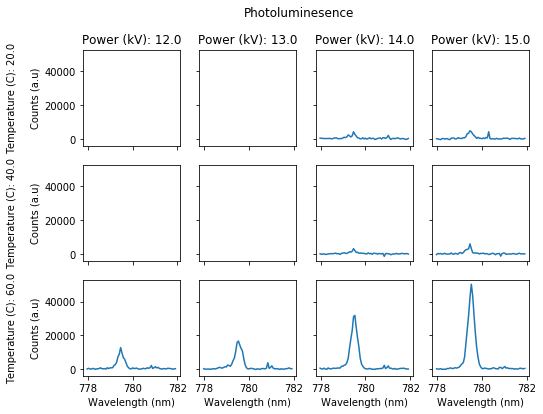

In [4]:
fig, axes = plot.common.plotgrid(dfs_PL_cut[0],squash = False, sel_col = -1, xlabel = "Wavelength (nm)", ylabel = "Counts (a.u)")
fig.suptitle('Photoluminesence')

Text(0.5,0.98,'Power Meter 1 (After Vapor Tube)')

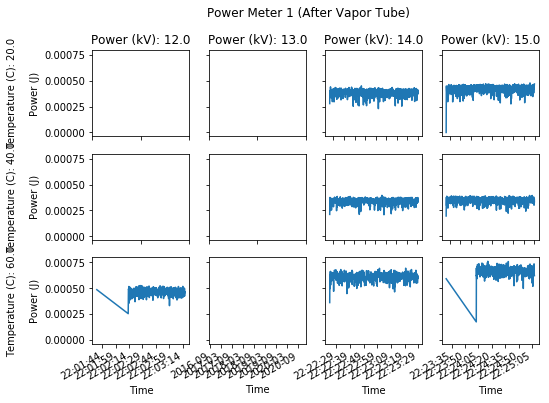

In [5]:
fig, axes = plot.common.plotgrid(dfs_pow_cut['m1'],sharex = False,sharey=True,xlabel = "Time", ylabel = "Power (J)")
fig.autofmt_xdate()
fig.suptitle('Power Meter 1 (After Vapor Tube)')

Text(0.5,0.98,'Power Meter 2 (Before Vapor Tube)')

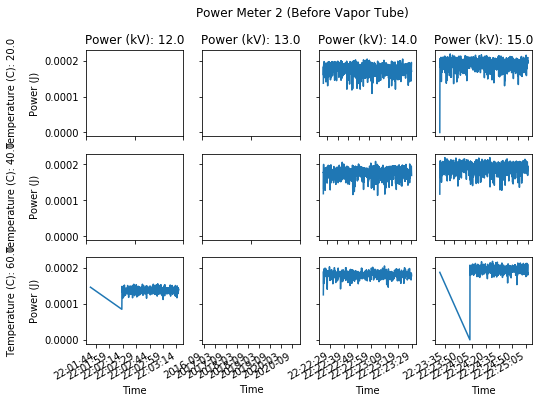

In [6]:
fig, axes = plot.common.plotgrid(dfs_pow_cut['m2'],sharex = False,xlabel = "Time", ylabel = "Power (J)")
fig.autofmt_xdate()
fig.suptitle('Power Meter 2 (Before Vapor Tube)')

Text(0.5,0.98,'Power Meter 1 (After Vapor Tube)')

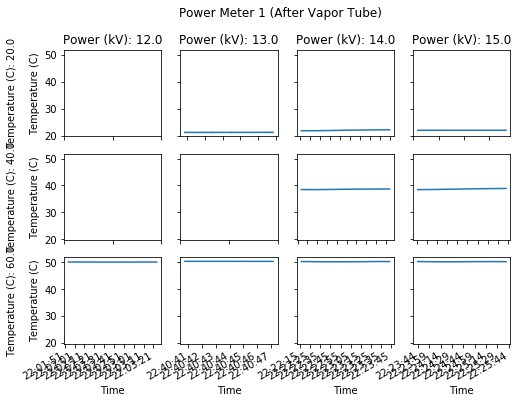

In [7]:
fig,axes = plot.common.plotgrid(dfs_T_cut['T3'],sharex = False,xlabel = "Time", ylabel = "Temperature (C)")
fig.autofmt_xdate()
fig.suptitle('Power Meter 1 (After Vapor Tube)')

Text(0,0.5,'Power kV')

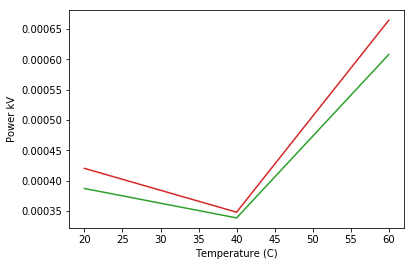

In [9]:
dfs_pow_m1_avg = dfs_pow_cut['m1'].copy()
for testcase in dfs_pow_m1_avg.index:
    dfs_pow_m1_avg.loc[testcase] = dfs_pow_m1_avg.loc[testcase].mean()[0]
dfs_pow_m1_avg = dfs_pow_m1_avg.unstack(level = 1)


dfs_pow_m1_avg
fig, ax = plt.subplots()


for column in dfs_pow_m1_avg.columns:
    ax.plot(dfs_pow_m1_avg[column], label = column)
ax.set_xlabel(dfs_pow_m1_avg.index.name)
ax.set_ylabel('Power kV')
# plt.legend()

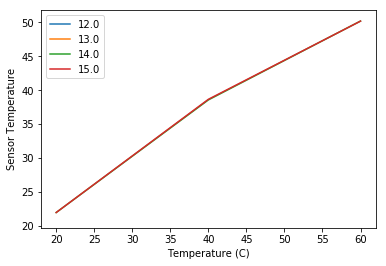

In [10]:
dfs_T_avg = dfs_T_cut['T3'].copy()
for testcase in dfs_T_avg.index:
    dfs_T_avg.loc[testcase] = dfs_T_avg.loc[testcase].mean()[0]
dfs_T_avg = dfs_T_avg.unstack(level = 1)
dfs_T_avg
fig, ax = plt.subplots()


for column in dfs_T_avg.columns:
    ax.plot(dfs_T_avg[column], label = column)
ax.set_xlabel(dfs_T_avg.index.name)
ax.set_ylabel('Sensor Temperature' )
plt.legend()